<a href="https://colab.research.google.com/github/Dharma-Ranganathan/AllAboutPython/blob/main/DL_Projects_Codes/MNIST_digit_classification_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mnist digit classification using neural network**

#**Dependencies**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
# seeds for random state
tf.random.set_seed(3)

In [3]:
from tensorflow import keras
from tensorflow.math import confusion_matrix

#**Data Collection**

In [4]:
from keras.datasets import mnist

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# check shapes
print(x_train.shape,y_train.shape)

print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#**EDA**

In [7]:
# check any single image
test = x_train[0]

# check
type(test)

numpy.ndarray

In [8]:
# shape of test
test.shape

(28, 28)

* we may notice, 3rd param not present, which means image is grayscale

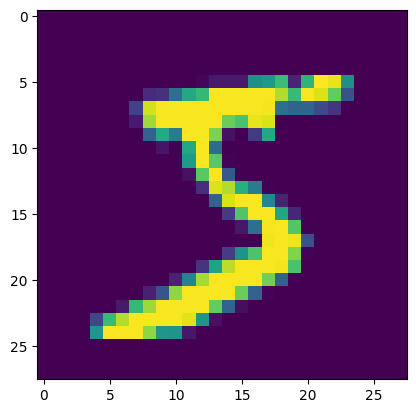

In [9]:
# let's plot this by matplotlib

plt.imshow(test)
plt.show()

In [10]:
# let's check corresponding y label
print(y_train[0])

5


**Check images by cv2**

In [11]:
import cv2
from google.colab.patches import cv2_imshow

In [12]:
# let's check test image
cv2_imshow(test)

* since 28x28 pixels, it shows small image

**check labels**

In [14]:
# check labels
print(y_train)

[5 0 4 ... 5 6 8]


In [15]:
# unique layers to put output layers
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


#**Neural Network layers**

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**model compilation**

In [16]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

**model training with train dataset**

In [17]:
# scaling x train and x test due to high variance

x_train = x_train / 255
x_test = x_test / 255

In [18]:
print(x_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [19]:
# model training
model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8510 - loss: 0.5250
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9554 - loss: 0.1523
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9676 - loss: 0.1082
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9748 - loss: 0.0834
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9790 - loss: 0.0680
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9826 - loss: 0.0574
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9854 - loss: 0.0478
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9876 - loss: 0.0413
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9892 - loss: 0.0364
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9903 - loss: 0.0308


* model has trained with an accuracy of 99% and loss of 0.0308

#**Prediction on seen data**

In [20]:
y_train_pred = model.predict(x_train)

# check
print(y_train_pred)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[[3.8891011e-07 1.1115212e-01 1.1858007e-04 ... 1.5316041e-06
  7.4287107e-07 1.9219300e-02]
 [1.0000000e+00 1.8830171e-07 9.7043514e-01 ... 5.8238087e-03
  1.6457570e-04 3.4764883e-01]
 [5.6154778e-07 1.9556824e-02 6.2909379e-04 ... 6.0251169e-02
  1.2394337e-02 2.5442278e-01]
 ...
 [4.0491395e-07 3.5875487e-01 4.9787388e-08 ... 7.5889901e-08
  2.0286875e-02 1.6084719e-01]
 [8.7601423e-02 6.9658053e-03 7.1334295e-02 ... 4.8842062e-03
  1.5286912e-06 1.5284480e-05]
 [1.0907401e-02 1.8380646e-06 2.4761148e-02 ... 2.6381746e-04
  9.9996257e-01 3.4951872e-01]]


* we may notice, that the output were given as probability

**function to predict labels from probability**

In [21]:
def return_labels(arr):
    return [np.argmax(i) for i in arr]

In [ ]:
# y_train_pred labels
y_pred_labels = return_labels(y_train_pred)

# check
print(y_pred_labels)

#**Prediction on unseen data**

In [23]:
y_test_pred = model.predict(x_test)

# check
print(y_test_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.82842254e-04 1.58163275e-05 4.29339670e-02 ... 9.99994397e-01
  6.63774321e-04 4.23991770e-01]
 [1.08147515e-06 5.47029316e-01 1.00000000e+00 ... 9.85202371e-13
  3.99144227e-03 1.39152228e-08]
 [1.64757701e-04 9.99777198e-01 1.23117894e-01 ... 4.74816531e-01
  1.09779164e-01 1.51812413e-03]
 ...
 [3.46243190e-09 1.15854286e-08 3.50209348e-06 ... 2.76186541e-02
  2.22159579e-01 3.86745393e-01]
 [2.53390517e-05 1.68976767e-05 3.38288024e-04 ... 6.09983942e-07
  9.63249564e-01 3.82909093e-06]
 [3.35003622e-03 4.32305296e-06 4.48623905e-06 ... 8.04214421e-12
  7.57438029e-05 9.40261361e-06]]


In [ ]:
y_test_labels = return_labels(y_test_pred)

# check
print(y_test_labels)

#**Model Evaluation on unseen data**

In [45]:
loss,acc = model.evaluate(x_test,y_test)

# check
print(acc)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9619 - loss: 0.1467
0.965399980545044
0.1345389187335968


* accuracy on unseen data : 96%
* loss function on unseen data : 0.1467

**confusion matrix on ytest and ylabels we found**

In [30]:
mat = confusion_matrix(y_test,y_test_labels)

# check
mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    2,    2,    0,    4,    5,    1,    3,   11],
       [   0, 1110,    1,    9,    2,    0,    2,    1,   10,    0],
       [   3,    0,  960,   38,    7,    0,    3,   12,    9,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    4,    5,    1],
       [   0,    1,    1,    1,  970,    0,    5,    1,    0,    3],
       [   2,    1,    0,   31,    2,  841,    7,    0,    5,    3],
       [   2,    2,    0,    1,    7,    4,  939,    0,    3,    0],
       [   1,    3,    6,    8,    4,    0,    0,  989,    3,   14],
       [   1,    0,    3,   30,    4,    2,    2,    2,  926,    4],
       [   1,    1,    0,   10,   18,    3,    2,    3,    4,  967]],
      dtype=int32)>

**visual of confusion matrix**

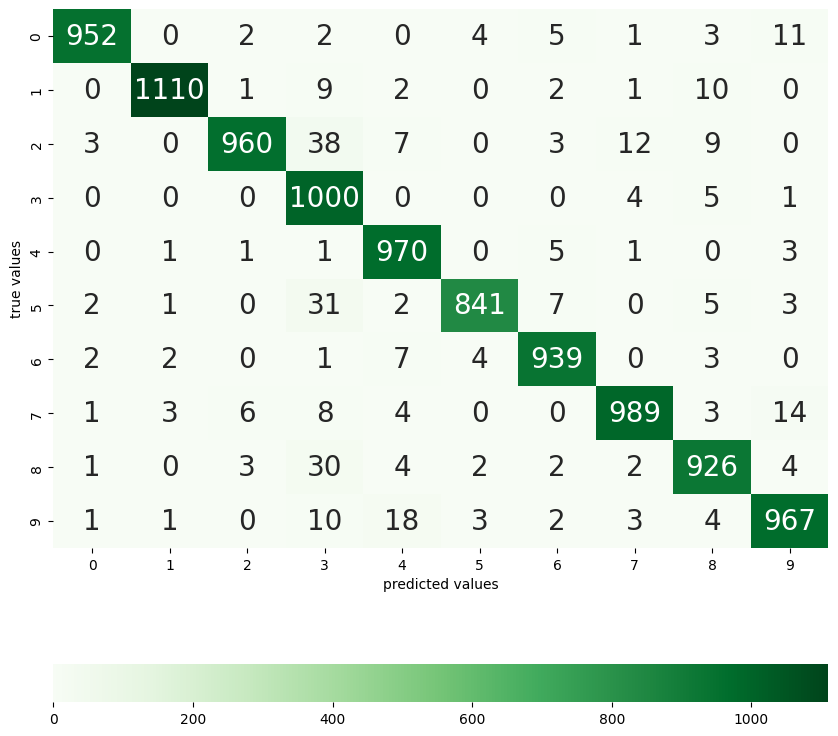

In [38]:

plt.figure(figsize=(10,10))
sns.heatmap(mat,annot=True,annot_kws={'size':20},fmt = 'd',cmap = 'Greens',cbar_kws={ 'orientation':'horizontal'})
plt.ylabel('true values')
plt.xlabel('predicted values')
plt.show()

#**Predictive System**

file path link : /content/mnist-3-0.png
(500, 506, 3)
(500, 506)


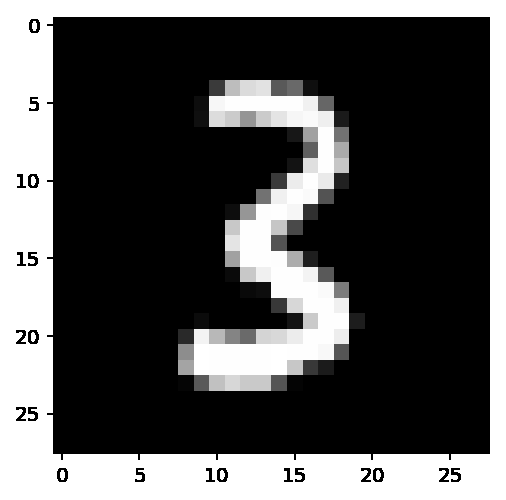

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


[np.int64(3)]

In [54]:
# input image
input_image = input('file path link : ')

# image to array
input_arr = cv2.imread(input_image)

# shape
print(input_arr.shape)

# RGB to grayscale
input_gray = cv2.cvtColor(input_arr,cv2.COLOR_RGB2GRAY)

# shape
print(input_gray.shape)

# check image
cv2_imshow(input_gray)

# resize and reshaping
input_resize = cv2.resize(input_gray,(28,28))

input_reshape = np.reshape(input_resize,[1,28,28])

# scaling
input_scaled = input_reshape / 255

# prediction
input_pred = model.predict(input_scaled)

# labeling
input_label = return_labels(input_pred)

# check
input_label

**Thank you...**